# ALGORTIMO GENÉTICO: Seleção Por Roleta

### Predefinições

In [1]:
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def get_population(size):
    if size > 20:
        return []
    
    fitness = [math.floor(rd.random() * 1000) / 100 for x in range(size)]
    names = [
    "Carvalho", "Pinheiro", "Erva-mate", "Bambu", "Samambaia", "Orquídea", "Girassol", "Grama", "Musgo", "Cacto",
    "Leão", "Elefante africano", "Zebra", "Onça-pintada", "Coiote", "Cervo", "Urso pardo", "Raposa", "Lobo-cinzento", "Guaxinim",
    "Águia-careca", "Coruja", "Pato", "Beija-flor", "Pomba", "Gavião", "Andorinha", "Pardal", "Gaivota", "Tucano",
    "Tartaruga marinha", "Cobra", "Jacaré", "Iguana", "Camaleão", "Lagarto", "Tartaruga terrestre", "Serpente coral", "Cágado", "Crocodilo-do-nilo",
    "Sapo", "Salamandra", "Rã", "Perereca", "Tritão", "Raia-alta", "Sapo-cururu", "Sapo-pipoca", "Salamandra-tigre", "Sapo-de-chifre",
    "Salmão", "Carpa", "Tubarão", "Dourado", "Peixe-palhaço", "Peixe-gato", "Truta", "Tilápia", "Barracuda", "Peixe-pipa",
    "Abelha", "Borboleta", "Joaninha", "Mosca", "Gafanhoto", "Formiga", "Besouro", "Libélula", "Mariposa", "Mosquito",
    "Aranha", "Escorpião", "Opilião", "Ácaro", "Carrapato", "Aranha-carangueira", "Escorpião-amarelo", "Aranha-marrom", "Carrapato-de-veado", "Tarântula",
    "Rato", "Esquilo", "Toupeira", "Doninha", "Ouriço-cacheiro", "Coelho", "Musaranho", "Castor", "Porco-espinho", "Morcego",
    "Pato-real", "Garça", "Flamingo", "Cisne", "Pássaro-kiwi", "Pelicano", "Águia-pesqueira", "Albatroz", "Pardela", "Águia-pescadora"]

    rd.shuffle(names)
    p = {names[i]: fitness[i] for i in range(size)}

    return p


In [3]:
p_size = 20 # Tamanho da população

T = 0.0 # Soma das aptidões de todos os indivíduos
S = 0.0 # Indicador da roleta
r = 0.0 # Número aleatório entre 0 e T

population = get_population(p_size)
selected = {} # Indivíduos selecionados


for x in range(p_size):
    T = T + list(population.values())[x]

### Seleção por Roleta

In [4]:
for x in range(p_size):
    S = 0
    r = rd.random() * T

    for y in population.values():
        S = S + y
        if S >= r:
            index = list(population.values()).index(y)
            names = list(population.keys())

            if names[index] in selected:
                selected[names[index]] += 1
            else:
                selected.update({names[index]: 1})
            
            break

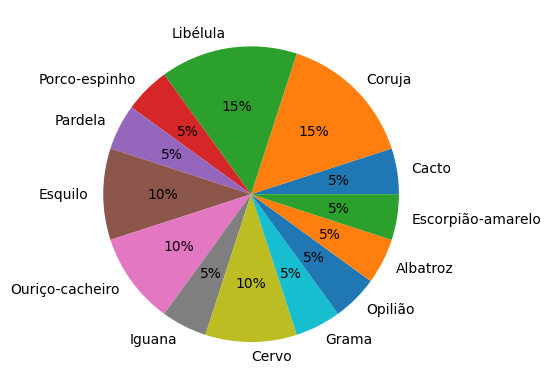

POPULAÇÃO INICIAL:  {'Iguana': 1.67, 'Urso pardo': 3.8, 'Grama': 1.54, 'Borboleta': 2.84, 'Libélula': 9.8, 'Aranha-carangueira': 0.63, 'Mosquito': 0.09, 'Perereca': 5.83, 'Porco-espinho': 6.86, 'Ácaro': 8.43, 'Opilião': 7.96, 'Albatroz': 6.19, 'Escorpião-amarelo': 4.52, 'Cervo': 6.1, 'Ouriço-cacheiro': 4.34, 'Aranha-marrom': 7.34, 'Pardela': 7.45, 'Cacto': 2.41, 'Coruja': 6.92, 'Esquilo': 7.39}

ESPÉCIES SELECIONADAS [13]:  ['Cacto', 'Coruja', 'Libélula', 'Porco-espinho', 'Pardela', 'Esquilo', 'Ouriço-cacheiro', 'Iguana', 'Cervo', 'Grama', 'Opilião', 'Albatroz', 'Escorpião-amarelo']
ESPÉCIES EXTINTAS [7]:  ['Urso pardo', 'Borboleta', 'Aranha-carangueira', 'Mosquito', 'Perereca', 'Ácaro', 'Aranha-marrom']


In [5]:
pizza = np.array(list(selected.values()))
plt.pie(pizza, labels = list(selected.keys()), autopct='%d%%')
plt.show()

print("POPULAÇÃO INICIAL: ", population)

extinct = [x for x in population.keys() if x not in selected.keys()]

print(f"\nESPÉCIES SELECIONADAS [{len(list(selected.keys()))}]: ", list(selected.keys()))
print(f"ESPÉCIES EXTINTAS [{len(extinct)}]: ", extinct)